<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH6_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH6_학습 관련 기술들

## 1. 매개변수갱신
> 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이었다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화라고 한다.<BR> 지금까지 우리는 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기를 이용했다. 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수의 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가섰다. 이를 확률적 경사하강법(SGD)라고 한다.<BR>지금부터SGD의 단점을 알아본 후 SGD와는 다른 최적화 기법을 소개하려 한다.

### 1) 확률적 경사하강법

In [2]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr # 학습률을 뜻하는 것으로 인스턴스 변수로 유지한다.
 
  def update(self, params, grads): # sgd과정에서 반복해서 불린다. 인수인 params와 grads는 딕셔너리 변수이다.
    for key in params.keys():
      params[key] -= self.lr * grads[key]

### 2) 확률적 경사하강법의 단점
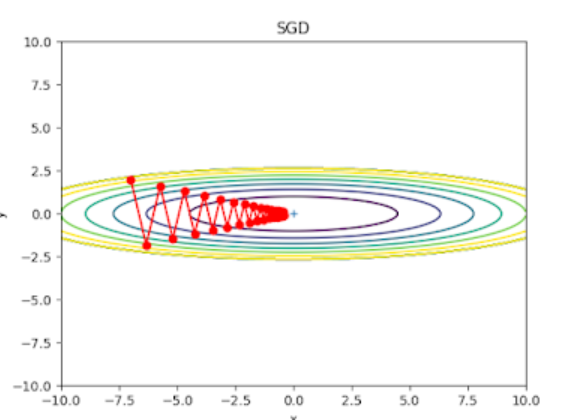
- 단점
  - y축 방향은 가파른데, x축 방향은 완만할 수 있다.
  - SGD는 심하게 굽어진 움직임을 보여준다. 상당히 비효율적인 움직임이다
  - 즉, SGD의 단점은 비등방성 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는지 함수) 에서 탐색 경로가 비효율적이라는 것이다. 
  - 이럴 때는 SGD 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 더 영리한 묘안이 간절해진다.
  - 또한 SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해 볼 수 있다.
> - 단점 개선 모델
     - 모멘텀
     - AdaGrad
     - Adam


### 3) 모멘텀(Momentum)
- 운동량을 뜻하는 단어로, 물리와 관계가 있다. 
  - 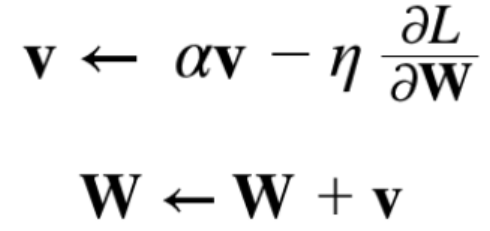

- W는 갱신할 가중치 매개변수
- ∂L/∂W는 W에 대한 손실함수의 기울기
- 에타는 학습률
- v는 물리학에서 말하는 속도에 해당된다.
> 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타낸다. 이러한 모멘텀은 공이 그릇의 바득을 구르는 듯한 움직임을 보여준다. 또 αv항은 물체가 아무런 힘을 받지 않을 때 서서히 하강히키는 역할을 한다.(α는 0.9등의 값으로 설정) 물리에서의 지면 마찰이나 공기 저항에 해당한다.

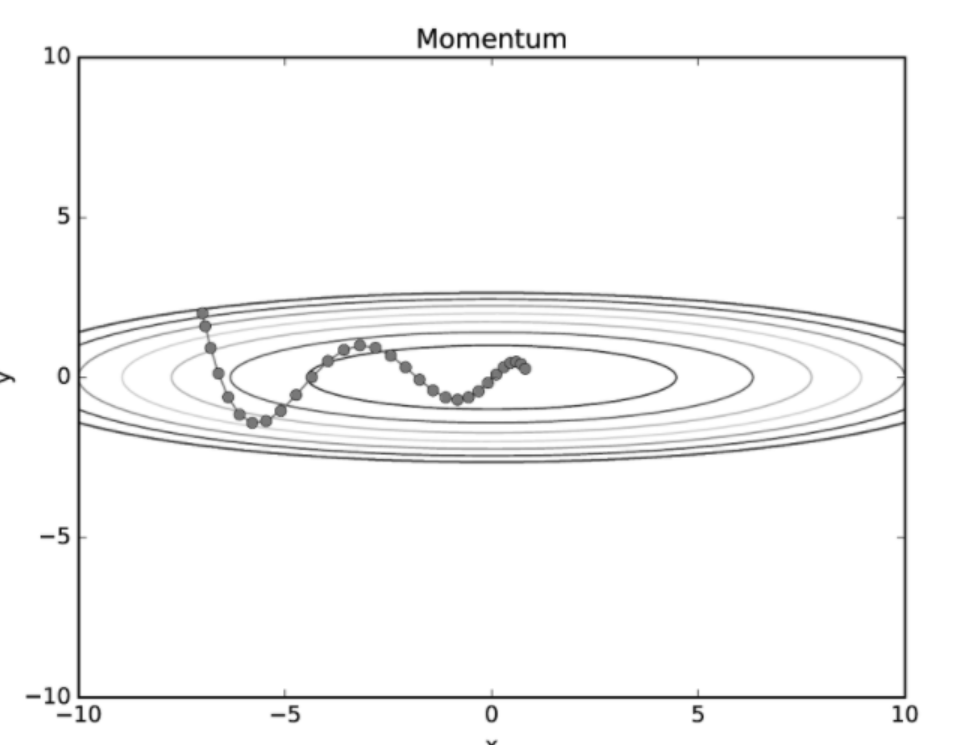

In [5]:
import numpy as np
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None # 인스턴스 변수 v는 물체의 속도이다. 초기화때 아무값도 담지않고 대신 

  def update(self, params, grads): # update가 처음 호출될때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
      params[key] += self.v[key]

### 4)AdaGrad
> 신경망 학습에서는 학습률값이 중요한데 이 값이 너무 작으면 학습 시간이 너무 길어지고 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다. 이 학습률을 정하는 효과적 기술로 학습률 감소가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기로 실제 신경망 학습에 자주 쓰인다.<br><br> AdaGrad는 각각의 매개변수에 맞춤형값을 만들어 준다. 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행하는 것이다.

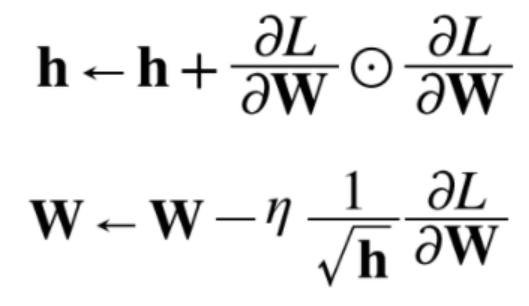

- W는 갱신할 가중치 매개변수 
- ∂L/∂W은 W에 대한 소실 함수의 기울기
- 에타는 학습률을 뜻한다.
- h는 기존 기울기 값을 제곱하여 계속 더해줌
- 1/루트h 를 곱해 학습률을 조정
> 매개변수의 원소중에서 많이 움직인 원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.

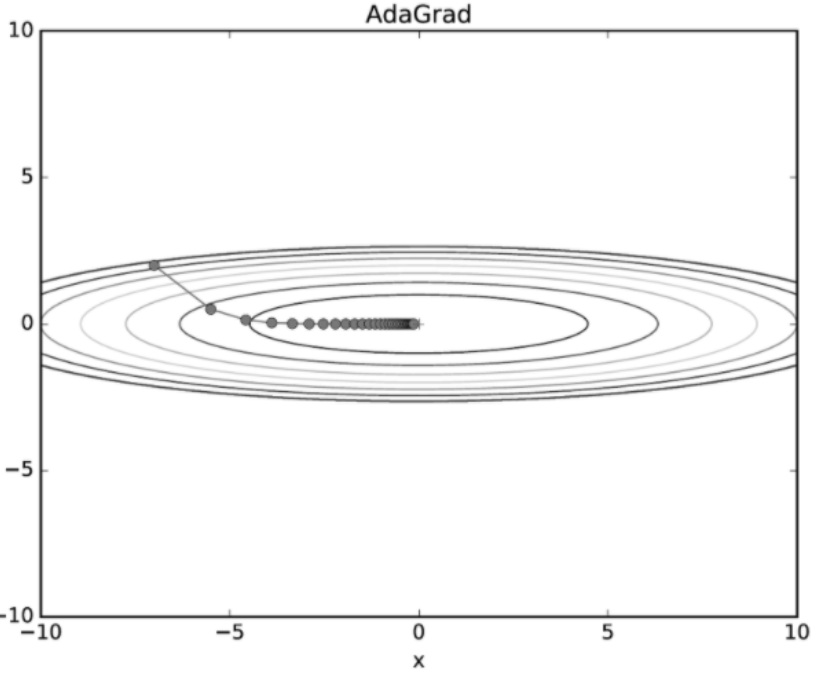

In [6]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
  
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] =- self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

- 1e-7이라는 작은 값을 더하는 부분을 주의해야 한다. 이 작은 값은 self.h[key]에 담겨 있다 해도 0으로 나누는 사태를 막아준다.
- 최솟값을 향해 효율적으로 움직이는 것을 알 구 있다.
- y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정한다.
- 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

### 5) Adam
> 모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 이 두가지 융합한 것이 Adam이다. Adam은 2015년에 제안된 새로운 방법 또 하이퍼파라미터의 편향 보정이 진행된다는 점도 Adam의 특징이다. 
  - 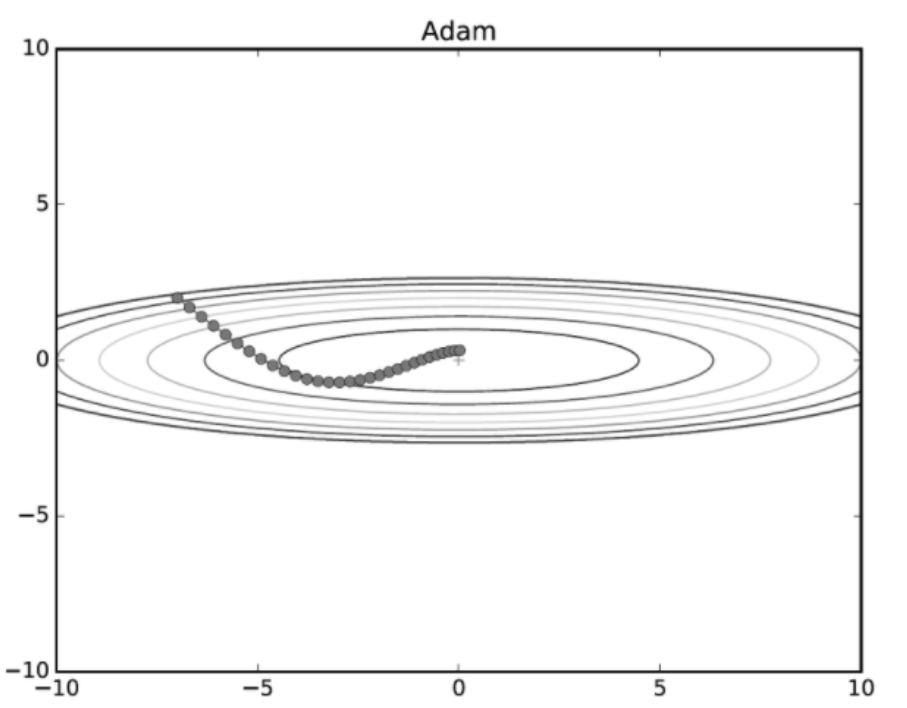

- Adam의 갱신과정도 그릇 바닥을 구르듯이 움직인다. 모멘텀과 비슷한 패턴인데
- 모멘컴 때보다 공의 좌우 흔들림이 적다.
- 이는 학습의 갱신 강도를 적응적으로 좆어해서 얻는 혜택이다.

### 6) MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.483460928813681
Momentum:2.4285640673800444
AdaGrad:2.2338209796388804
Adam:2.278213448570228
===========iteration:100===========
SGD:1.5105928540022344
Momentum:0.3295212967870809
AdaGrad:0.1443141867139049
Adam:0.2780729872518118
===========iteration:200===========
SGD:0.7480619879334651
Momentum:0.23798693495048182
AdaGrad:0.09482766329767323
Adam:0.21063960064001672
===========iteration:300===========
SGD:0.465838310620707
Momentum:0.20668309418855327
AdaGrad:0.05741699996730635
Adam:0.1830386102739191
===========iteration:400===========
SGD:0.2672317672851864
Momentum:0.10707416828146415
AdaGrad:0.05655458575455647
Adam:0.08279308355968114
===========iteration:500===========
SGD:0.3274036209032279
Momentum:0.1444353401410579
AdaGrad:0.08251541284358091
Adam:0.14656309175817192
===========iteration:600===========
SGD:0.32314880456081374
Momentum:0.1468610003803537
AdaGrad:0.030456204516186913
Adam:0.045270619575387555
===========iteration:700

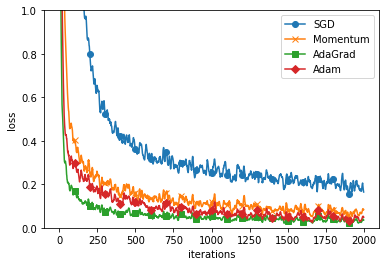

In [7]:
import os
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 2.가중치의 초깃값
> 신경망 학습에서 특히 중요한것이 가중치의 초깃값이다. 이번에는 권장 초깃값에 대해 설명하고 실험을통해 실제 신경망 학습이 신속하게 이뤄지는 모습을 확인하겠다.

### 1) 초깃값을 0으로 하면?
- 초깃값을 모두 0으로 해서는 안되는 이유(정확히는 가중치를 균일한 값으로 설정하면 안되는 이유)
  - 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.
  - 첫번째와 두번째 층의 가중치가 이면 순전파때는 입력층의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달된다.
  - 두번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두번째 층의 가중치가 모두 똑같이 갱신된다는 말이된다.
  - 그래서 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지하는 것이다. 이는 가중치를 여러개를 같는 의미가 없어진다.
> 해결방안은 초깃값을 무작위로 설정해야 한다.

### 2) 은닉층의 활성화값 분포
- 은닉층의 활성화의 분포를 관찰하면 중요한 정보를 얻을 수 잇다.
- 가중치의 초깃값에 따라 은닉층 활성화 값들이 어덯게 변화하는지 간단한 실험을 진행한다.
> 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화 값 분포를 히스토그램으로 그려본다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): # 활성화 함수는 시그모이드 함수를 이용했다.
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 입력데이터로 1000개의 데이터를 정규분포로 무작위로 생성하여 5층 신경망에 흘린다.
node_num = 100 # 각층의 뉴런은 100개씩이다.
hidden_layer_size = 5 # 5개의 층이 있다.
activations = {} # 각 층의 결과를 여기에 저장한다.

for i in range(hidden_layer_size): 
  if i != 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num)*1# 표준편차가 1인 정규분포를 이용했는데 이 분포된 정도를 바꿔가며 활성화 값들의 분폭 어떻게 변화하는지 관찰하는 것이 실험의 목적이다.
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

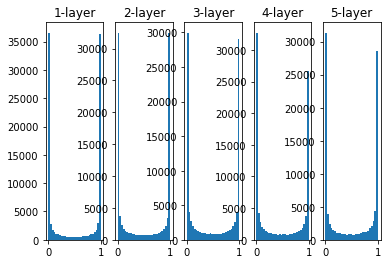

In [10]:
# 히스트그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1)+"-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다.
- 시그모이드 함수는 그 출력이 0에 가까워지자 그 미분은 0에 다가선다.
- 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기가 점점 작아지다가 사라진진다.
> 이를 기울기 소실이라고 한다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

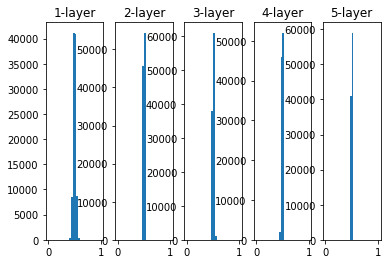

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): # 활성화 함수는 시그모이드 함수를 이용했다.
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 입력데이터로 1000개의 데이터를 정규분포로 무작위로 생성하여 5층 신경망에 흘린다.
node_num = 100 # 각층의 뉴런은 100개씩이다.
hidden_layer_size = 5 # 5개의 층이 있다.
activations = {} # 각 층의 결과를 여기에 저장한다.

for i in range(hidden_layer_size): # 표준편차가 1인 정규분포를 이용했는데 이 분포된 정도를 바꿔가며 활성화 값들의 분폭 어떻게 변화하는지 관찰하는 것이 실험의 목적이다.
  if i != 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num)*0.01
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z


# 히스트그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1)+"-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 표준편차를 0.01로 한 정규분포의 경우 각 층의 활성화 값 분포는 0.5 부근에 집중되었다.
- 기울기 문제가 발생하지 않았지만 활성화 값들이 치우쳤다는 것은 표현력 관점에서는 큰문제가 있는 것이다.
- 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없어진다는 뜻이다.